In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

youtube_df = pd.read_csv('../../datasets/processed/youtube_comments_processed.csv')

youtube_df.head()

,video_id,text,author,likes,date,time,year,met_gala_year
0,iWS3oVeyjL4,upppp ice ate monocl,@HippiesHealingApothecary,0,2025-05-15,12:00:00,2025,2025
1,iWS3oVeyjL4,spoken conect scream well deep perhap everi qu...,@lotsofinterests,0,2025-05-15,06:00:00,2025,2025
2,iWS3oVeyjL4,feel dear cours harri hair assign wouldv becom...,@SeventhGate008,0,2025-05-15,03:00:00,2025,2025
3,iWS3oVeyjL4,photographi excel hat kojo highlight der remin...,@shortourt14,0,2025-05-15,01:00:00,2025,2025
4,iWS3oVeyjL4,american anyway histori narrat comedi unlik af...,@KindnessKillsNONDO,0,2025-05-14,17:00:00,2025,2025


In [2]:
# Check NaN values by column initially
print("Initial NaN counts by column:")
nan_by_column = youtube_df.isna().sum()
print(nan_by_column)

# Method 1: Use inplace=True (modifies the original DataFrame)
print("\nDropping rows with NaN in 'text' column...")
youtube_df.dropna(subset=['text'], inplace=True)

print("\nDropping rows with NaN in 'author' column...")
youtube_df.dropna(subset=['author'], inplace=True)

# Check NaN values after dropping
print("\nNaN counts after dropping rows:")
nan_by_column = youtube_df.isna().sum()
print(nan_by_column)

# Print the shape of DataFrame before and after to confirm rows were dropped
print(f"\nFinal DataFrame shape: {youtube_df.shape}")

Initial NaN counts by column:
video_id            0
text             2281
author             17
likes               0
date                0
time                0
year                0
met_gala_year       0
dtype: int64

Dropping rows with NaN in 'text' column...

Dropping rows with NaN in 'author' column...

NaN counts after dropping rows:
video_id         0
text             0
author           0
likes            0
date             0
time             0
year             0
met_gala_year    0
dtype: int64

Final DataFrame shape: (69780, 8)


In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# start VADER sentiment analyser.
sia = SentimentIntensityAnalyzer()

modern_positive_slang = {
    'slay': 3.0,          # Excellent performance
    'fire': 3.0,          # Very good
    'lit': 2.5,           # Amazing
    'queen': 2.5,         # Term of endearment/praise
    'iconic': 2.7,        # Memorable/remarkable
    'goals': 2.5,         # Aspirational
    'stan': 3.0,          # Strong admiration
    'vibe': 1.5,          # Good feeling
    'periodt': 2.5,       # Emphasizes a point (usually positive)
    'glowing': 2.0,       # Looking great
    'obsessed': 2.5,      # Really like something
    'chef\'s kiss': 3.0,  # Perfect
    'serve': 2.5,         # Impressive display
    'ate': 3.0,           # Did extremely well
    'baddie': 2.5,        # Attractive and confident
    'snatched': 2.5,      # Looking good/perfect
    'yas': 2.5,           # Enthusiastic yes
    'slaps': 2.0,         # Very good
    'bop': 2.0,           # Catchy/good song
    'glow up': 2.5,       # Impressive improvement
    'goated': 3.0,        # Greatest of all time
    'wig': 2.5,           # So good it's shocking
    'flex': 1.5,          # Show off (in a good way)
    'lowkey': 0.5,        # Somewhat/subtly
    'highkey': 1.5,       # Obviously/very
    'drop': 1.0,          # Release something
}

# Negative terms with their intensity (between -1 and -4)
modern_negative_slang = {
    'basic': -1.5,        # Unoriginal/boring
    'mid': -2.0,          # Mediocre/disappointing
    'cringe': -2.5,       # Embarrassing
    'yikes': -2.0,        # Expression of dismay
    'boomer': -1.5,       # Out of touch (age-related)
    'karen': -2.5,        # Entitled/demanding
    'trash': -3.0,        # Very bad
    'flop': -2.5,         # Failure
    'cancelled': -2.5,    # Rejected/ostracized
    'sus': -1.5,          # Suspicious/questionable
    'drama': -1.5,        # Unnecessary conflict
    'ghost': -2.0,        # Ignore someone
    'toxic': -3.0,        # Harmful relationship/behavior
    'triggered': -1.5,    # Upset by something
    'gaslighting': -3.0,  # Psychological manipulation
    'problematic': -2.0,  # Having issues
    'fell off': -2.0,     # Declined in quality/popularity
    'fumbled': -2.0,      # Messed up an opportunity
    'cap': -1.5,          # Lying/not true
    'pressed': -1.5,      # Upset/bothered
    'brutal': -2.0,       # Harsh/severe
    'tea': -1.0,          # Gossip
    'shade': -1.5,        # Subtle disrespect
    'cancelled': -2.5,    # Socially rejected
    'fake': -2.0,         # Inauthentic
    'dead': -0.5,         # Extremely funny (can be positive in context)
}

# Update the VADER lexicon with our custom terms
sia.lexicon.update({**modern_positive_slang, **modern_negative_slang})

def compute_sentiment(l_tokens):
    
    return sia.polarity_scores(l_tokens)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/harrymarshall/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
sentiment_scores = []

for text in youtube_df['text']:
    sentiment = compute_sentiment(text)
    sentiment_scores.append(sentiment['compound'])

youtube_df['sentiment'] = sentiment_scores

In [5]:
youtube_df.head()

,video_id,text,author,likes,date,time,year,met_gala_year,sentiment
0,iWS3oVeyjL4,upppp ice ate monocl,@HippiesHealingApothecary,0,2025-05-15,12:00:00,2025,2025,0.6124
1,iWS3oVeyjL4,spoken conect scream well deep perhap everi qu...,@lotsofinterests,0,2025-05-15,06:00:00,2025,2025,0.8689
2,iWS3oVeyjL4,feel dear cours harri hair assign wouldv becom...,@SeventhGate008,0,2025-05-15,03:00:00,2025,2025,0.9274
3,iWS3oVeyjL4,photographi excel hat kojo highlight der remin...,@shortourt14,0,2025-05-15,01:00:00,2025,2025,0.6597
4,iWS3oVeyjL4,american anyway histori narrat comedi unlik af...,@KindnessKillsNONDO,0,2025-05-14,17:00:00,2025,2025,0.7845


In [6]:
# ========== PRINT AVERAGE SENTIMENT STATS ==========
# Print average sentiment by year
avg_by_year = youtube_df.groupby('met_gala_year')['sentiment'].mean().reset_index()
avg_by_year.columns = ['Met Gala Year', 'Average Sentiment']
print("\nAverage Sentiment by Met Gala Year:")
print(avg_by_year.to_string(index=False))

# Print average sentiment by video ID
avg_by_video = youtube_df.groupby('video_id')['sentiment'].mean().reset_index()
avg_by_video.columns = ['Video ID', 'Average Sentiment']
print("\nAverage Sentiment by Video ID:")
print(avg_by_video.to_string(index=False))


Average Sentiment by Met Gala Year:
 Met Gala Year  Average Sentiment
          2021           0.100977
          2022           0.108020
          2023           0.089603
          2024           0.108640
          2025           0.161203

Average Sentiment by Video ID:
   Video ID  Average Sentiment
Ar9NFhmSnrk           0.162893
AyFzKATCiv0           0.200681
BbAgK_jGRfE           0.084575
E_WcvAiKQfI           0.104425
ItZ4SlxpOiI           0.153040
JGVq7J5_sTk           0.079922
LHCTW4pckDo           0.064578
NW2oiPiqByk           0.155504
P71sr0kZY7o           0.125748
PbRZcvVnF0w           0.071082
RqYRTmpBu0k           0.041410
XUIB4oWw37I           0.183872
YMPPo7APaoA           0.139984
ZMrgtotgThk           0.095576
cpFc1RPOF7s           0.147437
iWS3oVeyjL4           0.144920
jlR-T42I18E           0.146639
lyJqXb8Nj-I           0.138224
mrFfGptVzrI           0.088963
qEvQa6xayYE           0.136272
qKYhgn1TiV4           0.162550
urdBX1l0I6I           0.087668


/var/folders/58/0gr13fcd0rj8t5cp8_mhf2m00000gn/T/ipykernel_95601/1240413970.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='met_gala_year', y='sentiment', data=youtube_df, palette='viridis')


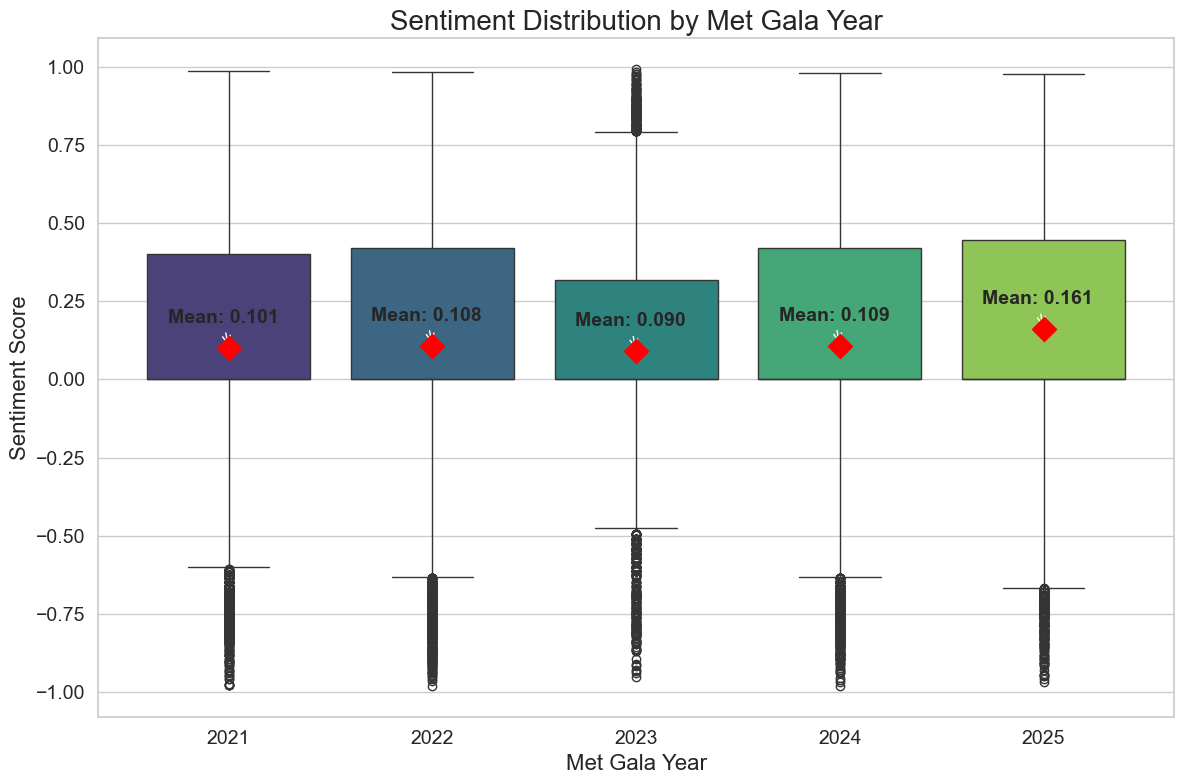

/var/folders/58/0gr13fcd0rj8t5cp8_mhf2m00000gn/T/ipykernel_95601/1240413970.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='video_id', y='sentiment', data=youtube_df, palette='muted')


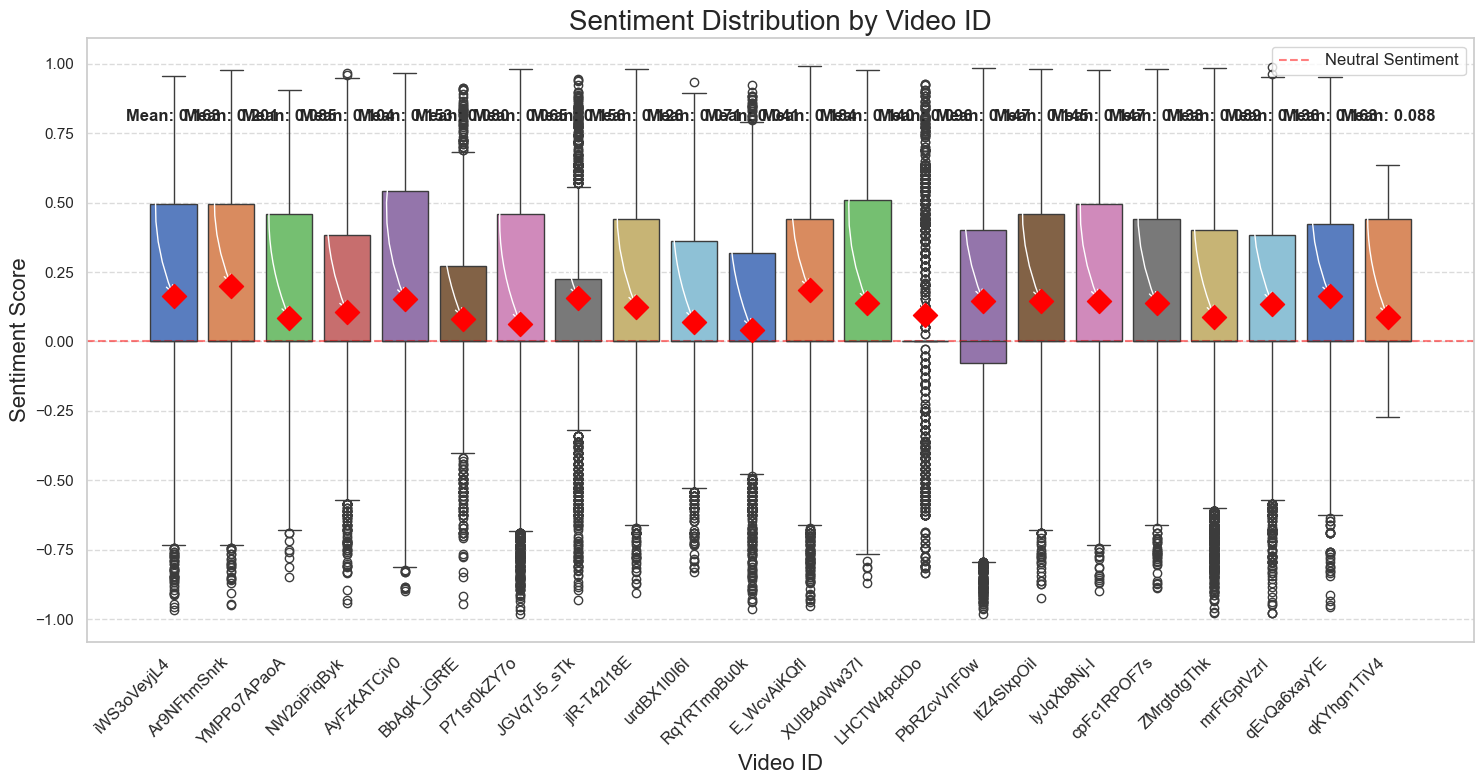


Average Sentiment by Met Gala Year:
 Met Gala Year  Average Sentiment
          2021           0.100977
          2022           0.108020
          2023           0.089603
          2024           0.108640
          2025           0.161203

Average Sentiment by Video ID:
   Video ID  Average Sentiment
Ar9NFhmSnrk           0.162893
AyFzKATCiv0           0.200681
BbAgK_jGRfE           0.084575
E_WcvAiKQfI           0.104425
ItZ4SlxpOiI           0.153040
JGVq7J5_sTk           0.079922
LHCTW4pckDo           0.064578
NW2oiPiqByk           0.155504
P71sr0kZY7o           0.125748
PbRZcvVnF0w           0.071082
RqYRTmpBu0k           0.041410
XUIB4oWw37I           0.183872
YMPPo7APaoA           0.139984
ZMrgtotgThk           0.095576
cpFc1RPOF7s           0.147437
iWS3oVeyjL4           0.144920
jlR-T42I18E           0.146639
lyJqXb8Nj-I           0.138224
mrFfGptVzrI           0.088963
qEvQa6xayYE           0.136272
qKYhgn1TiV4           0.162550
urdBX1l0I6I           0.087668

Sentiment Var

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming youtube_df is already loaded and contains your data

# Set the style for better visualization
sns.set(style="whitegrid")

# FIRST PLOT: Sentiment by Met Gala Year (full screen)
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='met_gala_year', y='sentiment', data=youtube_df, palette='viridis')
plt.title('Sentiment Distribution by Met Gala Year', fontsize=20)
plt.xlabel('Met Gala Year', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add mean values as red diamonds
year_means = youtube_df.groupby('met_gala_year')['sentiment'].mean()
for i, mean_val in enumerate(year_means):
    plt.scatter(i, mean_val, color='red', marker='D', s=150, zorder=10)
    plt.annotate(f'Mean: {mean_val:.3f}', 
                 xy=(i, mean_val),
                 xytext=(i-0.3, mean_val+0.08),
                 fontsize=14,
                 fontweight='bold',
                 arrowprops=dict(arrowstyle='->'))

# Adjust layout and save the first figure
plt.tight_layout()
plt.savefig('sentiment_by_year_boxplot.png', dpi=300)
plt.show()

# SECOND PLOT: Sentiment by Video ID (full screen)
plt.figure(figsize=(15, 8))  # Make it wider for more video IDs
ax = sns.boxplot(x='video_id', y='sentiment', data=youtube_df, palette='muted')
plt.title('Sentiment Distribution by Video ID', fontsize=20)
plt.xlabel('Video ID', fontsize=16)
plt.ylabel('Sentiment Score', fontsize=16)

# Improve the readability of video IDs
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a grid for easier reading across the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean values as red diamonds
video_means = youtube_df.groupby('video_id')['sentiment'].mean()
for i, mean_val in enumerate(video_means):
    plt.scatter(i, mean_val, color='red', marker='D', s=150, zorder=10)
    
    # Position the annotation based on available space
    if len(video_means) > 5:
        # For many video IDs, position annotations more carefully
        plt.annotate(f'Mean: {mean_val:.3f}', 
                     xy=(i, mean_val),
                     xytext=(i, max(mean_val + 0.1, youtube_df['sentiment'].max() * 0.8)),
                     fontsize=12,
                     fontweight='bold',
                     ha='center',
                     arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))
    else:
        # For fewer video IDs, use simpler annotations
        plt.annotate(f'Mean: {mean_val:.3f}', 
                     xy=(i, mean_val),
                     xytext=(i-0.3, mean_val+0.08),
                     fontsize=14,
                     fontweight='bold',
                     arrowprops=dict(arrowstyle='->'))

# Add a horizontal line at sentiment = 0 for reference
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral Sentiment')
plt.legend(fontsize=12)

# Adjust layout and save the second figure
plt.tight_layout()
plt.savefig('sentiment_by_video_boxplot.png', dpi=300)
plt.show()

# Calculate and print average sentiment statistics
# Print average sentiment by year
avg_by_year = youtube_df.groupby('met_gala_year')['sentiment'].mean().reset_index()
avg_by_year.columns = ['Met Gala Year', 'Average Sentiment']
print("\nAverage Sentiment by Met Gala Year:")
print(avg_by_year.to_string(index=False))

# Print average sentiment by video ID
avg_by_video = youtube_df.groupby('video_id')['sentiment'].mean().reset_index()
avg_by_video.columns = ['Video ID', 'Average Sentiment']
print("\nAverage Sentiment by Video ID:")
print(avg_by_video.to_string(index=False))

# Also calculate standard deviation to understand variability
std_by_year = youtube_df.groupby('met_gala_year')['sentiment'].std().reset_index()
std_by_year.columns = ['Met Gala Year', 'Sentiment Std Dev']
print("\nSentiment Variability by Met Gala Year:")
print(std_by_year.to_string(index=False))

std_by_video = youtube_df.groupby('video_id')['sentiment'].std().reset_index()
std_by_video.columns = ['Video ID', 'Sentiment Std Dev']
print("\nSentiment Variability by Video ID:")
print(std_by_video.to_string(index=False))

# Display the plot
plt.show()

Starting topic modeling on YouTube comments...
Processing 69780 comments...
Creating document-term matrix...
Document-term matrix shape: (69780, 1000)
Fitting LDA model with 15 topics...

Topics found by LDA:
Topic #1: outfit, refer, design, miss, mean, point, theme, wore, gown, vibe
Topic #2: dress, marilyn, black, liter, icon, right, wear, watch, theme, white
Topic #3: met, gala, billi, lisa, jenni, pretti, work, littl, old, bodi
Topic #4: dress, best, way, rihanna, invit, cardi, rose, happi, parti, job
Topic #5: agre, come, hair, gorgeou, feel, zendaya, perfect, art, assign, kill
Topic #6: emma, someth, america, live, opinion, world, let, wish, lil, real
Topic #7: love, blake, fit, luke, day, everyth, end, care, fact, wow
Topic #8: amaz, someon, ye, say, celebr, interview, cultur, kid, ladi, big
Topic #9: beauti, everyon, referenc, inspir, pleas, use, differ, color, stop, moment
Topic #10: stun, didnt, carpet, red, event, age, bore, omg, queen, sure
Topic #11: theme, year, kim, wear

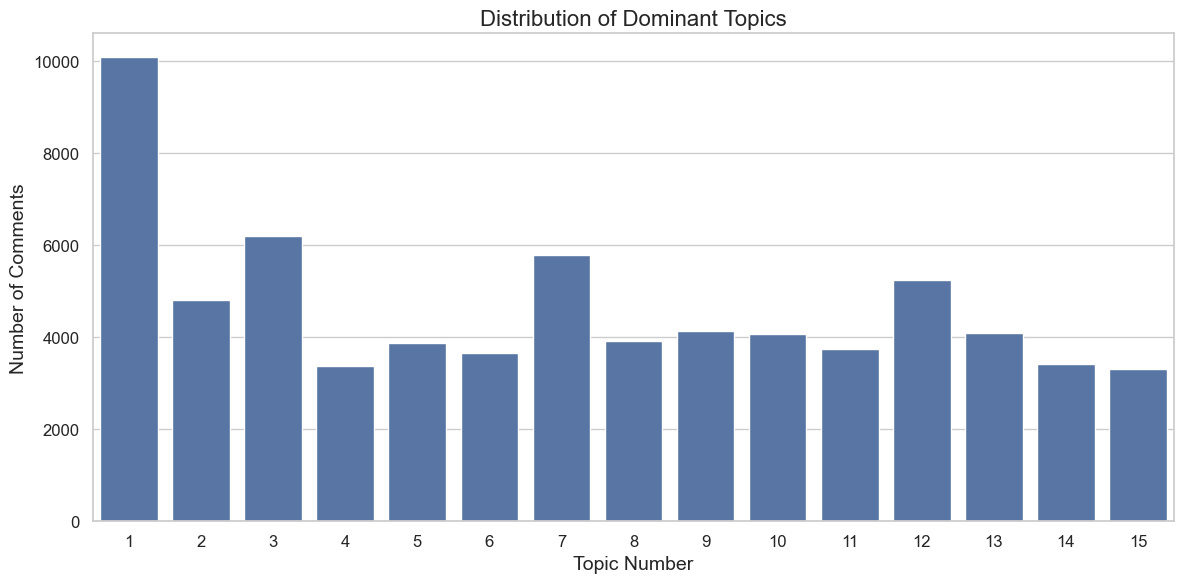


Analyzing sentiment by topic...

Sentiment Analysis by Topic:
 Topic  Average Sentiment  Sentiment Std Dev  Number of Comments
     7           0.429873           0.359785                5794
     4           0.271076           0.376517                3383
    13           0.205914           0.364717                4090
    12           0.205129           0.330472                5246
     8           0.117508           0.340687                3924
    15           0.112329           0.348916                3302
    10           0.094321           0.347456                4063
     3           0.091935           0.349931                6211
     5           0.076047           0.348837                3874
    14           0.065605           0.348917                3420
     9           0.064033           0.343086                4145
     2           0.055760           0.401054                4821
     6           0.036445           0.392963                3657
     1           0.014994  

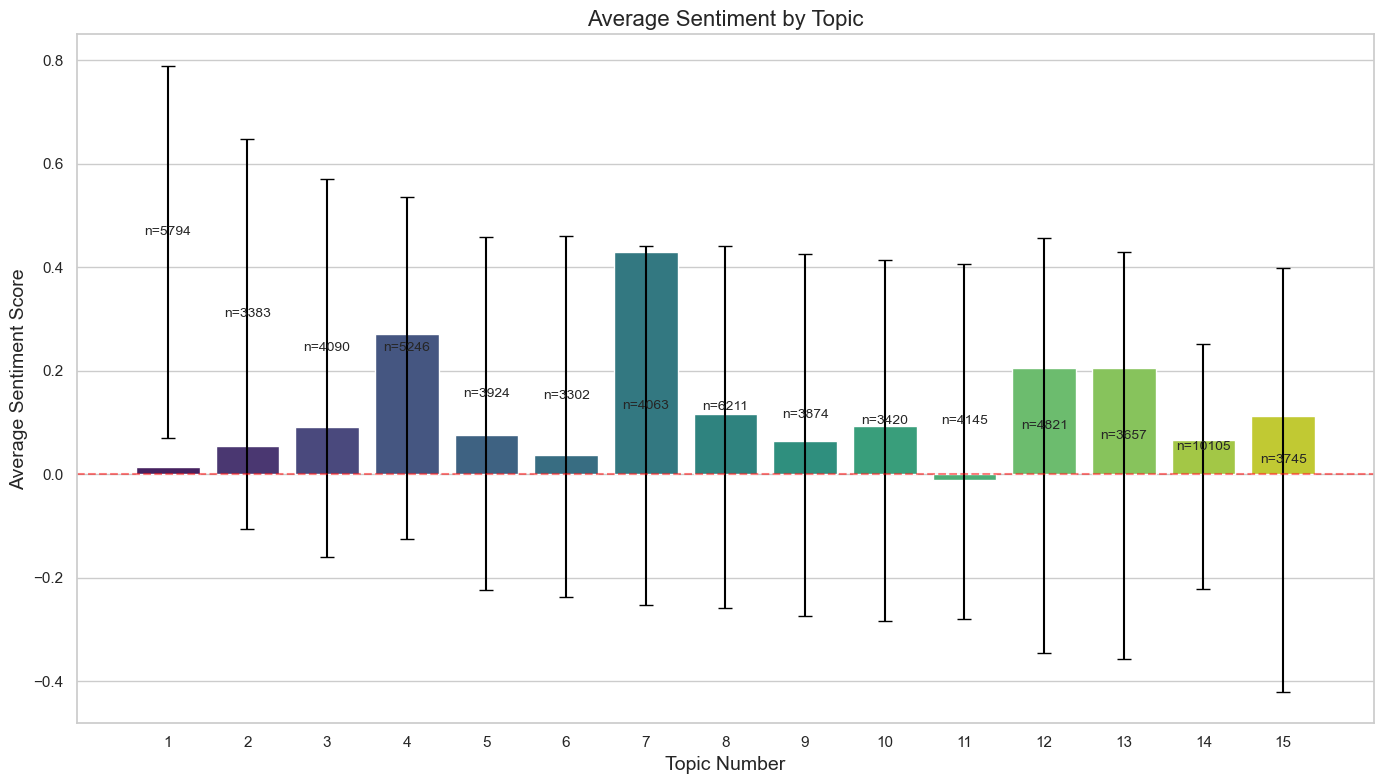


Results saved to 'youtube_comments_with_topics.csv'

Summary of Topic Modeling Results:
- Analyzed 69780 YouTube comments
- Identified 15 distinct topics
- Most common topic word: theme
- Total unique topic words: 145
- Most positive topic: Topic 7 with sentiment 0.430
- Most negative topic: Topic 11 with sentiment -0.011


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Assuming youtube_df is your existing DataFrame with already preprocessed text
print("Starting topic modeling on YouTube comments...")
print(f"Processing {len(youtube_df)} comments...")

# Create document-term matrix directly from the existing preprocessed text
print("Creating document-term matrix...")
vectorizer = CountVectorizer(
    max_df=0.95,         # Ignore terms that appear in more than 95% of documents
    min_df=2,            # Ignore terms that appear in fewer than 2 documents
    max_features=1000,   # Limit to 1000 features for efficiency
    stop_words='english' # Additional stopword filtering
)

# Use the text column directly since it's already preprocessed
doc_term_matrix = vectorizer.fit_transform(youtube_df['text'])
feature_names = vectorizer.get_feature_names_out()

print(f"Document-term matrix shape: {doc_term_matrix.shape}")

# Set the number of topics for LDA
num_topics = 15

# Create and fit the LDA model
print(f"Fitting LDA model with {num_topics} topics...")
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    max_iter=10,
    learning_method='online',
    random_state=42,
    batch_size=128,
    learning_decay=0.7
)

# Fit the model to the document-term matrix
lda_model.fit(doc_term_matrix)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_terms = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_terms)
        print(f"Topic #{topic_idx+1}: {', '.join(topic_terms)}")
    return topics

# Print top words for each topic
print("\nTopics found by LDA:")
all_topics_list = print_top_words(lda_model, feature_names)

# Get topic distribution for each document
topic_distributions = lda_model.transform(doc_term_matrix)

# Create a dictionary to store document IDs
submission_ids = youtube_df.index.tolist()

# Assign the most probable topic to each submission
submission_topics = {}
all_topics = set()

for i, submission_id in enumerate(submission_ids):
    # Get the most probable topic for this document
    dominant_topic_idx = np.argmax(topic_distributions[i])
    # Get the top terms for this topic
    top_terms = all_topics_list[dominant_topic_idx]
    # Store as the topic for this submission
    submission_topics[submission_id] = top_terms
    # Add top terms to overall set of topics
    all_topics.update(top_terms)

# Add dominant topic index to the DataFrame
youtube_df['dominant_topic'] = [np.argmax(dist) + 1 for dist in topic_distributions]

# Count the frequency of topics across all submissions
topic_counts = {}
for topics in submission_topics.values():
    for topic in topics:
        if topic in topic_counts:
            topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1

# Print the most common topics
print("\nMost Common Topics:")
for topic, count in sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{topic}: {count}")

# Visualize the distribution of topics
plt.figure(figsize=(12, 6))
topic_dist = youtube_df['dominant_topic'].value_counts().sort_index()
sns.barplot(x=topic_dist.index, y=topic_dist.values)
plt.title('Distribution of Dominant Topics', fontsize=16)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('topic_distribution.png', dpi=300)
plt.show()

# Analyze sentiment by topic
if 'sentiment' in youtube_df.columns:
    print("\nAnalyzing sentiment by topic...")
    
    # Calculate average sentiment for each topic
    topic_sentiment = youtube_df.groupby('dominant_topic')['sentiment'].agg(['mean', 'std', 'count']).reset_index()
    topic_sentiment.columns = ['Topic', 'Average Sentiment', 'Sentiment Std Dev', 'Number of Comments']
    
    print("\nSentiment Analysis by Topic:")
    print(topic_sentiment.sort_values(by='Average Sentiment', ascending=False).to_string(index=False))
    
    # Visualize sentiment by topic
    plt.figure(figsize=(14, 8))
    
    # Sort topics by average sentiment
    sorted_topics = topic_sentiment.sort_values('Average Sentiment', ascending=False)
    
    # Create bar plot with error bars
    sns.barplot(x='Topic', y='Average Sentiment', data=sorted_topics, palette='viridis')
    
    # Add error bars
    plt.errorbar(x=range(len(sorted_topics)), 
                 y=sorted_topics['Average Sentiment'], 
                 yerr=sorted_topics['Sentiment Std Dev'], 
                 fmt='none', color='black', capsize=5)
    
    # Add labels and title
    plt.title('Average Sentiment by Topic', fontsize=16)
    plt.xlabel('Topic Number', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    
    # Add a horizontal line at sentiment = 0
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    # Add number of comments as annotations
    for i, row in enumerate(sorted_topics.itertuples()):
        plt.annotate(f'n={row._4}', 
                    xy=(i, row._2), 
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', 
                    va='bottom',
                    fontsize=10)
    
    plt.tight_layout()
    plt.savefig('sentiment_by_topic.png', dpi=300)
    plt.show()

# Save the results to CSV
youtube_df.to_csv('youtube_comments_with_topics.csv', index=False)
print("\nResults saved to 'youtube_comments_with_topics.csv'")

# Print a summary of findings
print("\nSummary of Topic Modeling Results:")
print(f"- Analyzed {len(youtube_df)} YouTube comments")
print(f"- Identified {num_topics} distinct topics")
print(f"- Most common topic word: {max(topic_counts.items(), key=lambda x: x[1])[0]}")
print(f"- Total unique topic words: {len(all_topics)}")

if 'sentiment' in youtube_df.columns:
    most_positive_topic = topic_sentiment.loc[topic_sentiment['Average Sentiment'].idxmax()]
    most_negative_topic = topic_sentiment.loc[topic_sentiment['Average Sentiment'].idxmin()]
    
    print(f"- Most positive topic: Topic {int(most_positive_topic['Topic'])} with sentiment {most_positive_topic['Average Sentiment']:.3f}")
    print(f"- Most negative topic: Topic {int(most_negative_topic['Topic'])} with sentiment {most_negative_topic['Average Sentiment']:.3f}")